<a href="https://www.kaggle.com/code/ayushs9020/understanding-the-competition-s3e17?scriptVersionId=133372233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Playground Series S-3 E-17

<img src = "https://i0.wp.com/laughbreak.com/wp-content/uploads/2019/09/Banana-Ducks.jpg?fit=855%2C1024&ssl=1" width = 300>

**I could not downalod the actual image from playground series, so I am using the banana Duck, hope you will not mind**

$Machine$ $failure$ is when a `machine stops working properly` due to a `defect` or `malfunction`. This can lead to 
* $Downtime$
* $Lost$ $Productivity$
* $Safety$ $Hazards$. 

There can be varous factors

|||
|---|---
|$Defects$|Machines can be `defective from the factory`, or they can `develop defects over time` due to wear and tear.
|$Malfunctions$|Machines can `malfunction` due to `improper use`, `incorrect maintenance`, or `environmental factors` such as `extreme temperatures` or `humidity`.

Here we will use $Machine$ $Learning$ to `predict machine failure`. Machine learning algorithms can `analyze historical data` to `identify patterns that may indicate an impending failure`. This information can then be used to `schedule preventive maintenance` or to take other steps to `mitigate the risks of failure`.

# 1 | Advisory 📑
This is a `binary classification` problem, where $0$ is for `not failing` and $1$ is for `failing` 

|||
|---|---|
|$Rotational$ $speed$ $[rpm]$|The data has a lot of `outliers`, placing a kink at $2,000$, might help out
|$Time$ $Warping$ $Filter$ $$(TWF)$$|`No Use` , Data consists of $99$%$+$ one class only
|$Hidden$ $Failure$ $Detection$ $$(HFD)$$|`No Use` , Data consists of $99$%$+$ one class only
|$Premature$ $Wear$ $Failure$ $$(PWF)$$|`No Use` , Data consists of $99$%$+$ one class only
|$Over$ $Strain$ $Failure$ $$(OSF)$$|`No Use` , Data consists of $99$%$+$ one class only
|$Removed$ $No$ $Failure$ $$(RNF)$$|`No Use` , Data consists of $99$%$+$ one class only

# 2 | Data 📊

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

In [3]:
data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


This is our trainign data, consisting of $14$ `columns` and $1,36,429$ `rows` accounting to a total of $19,10,006$ values

Lets first remove the columns `id` , `Product ID`, because these are like `primary keys` for the dataset and are of `no use to the model building`.

In [4]:
data.drop(["id" , "Product ID"] , axis = 1 , inplace = True)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


|Column|Info|Effect|
|---|---|---
|$Type$|Which category the machine is of, basically there are $3$ categories $L , M , h$
|$Air$ $Temperature$ $$[K]$$|It is the temperature of the air surrounding the machine, measured in Kelvin.|`Directly Proportional`
|$Process$ $Temperature$ $$[K]$$|The temperature of the material being processed by a machine|`Directly Proportional`
|$Rotational$ $Speed$ $$[rpm]$$|The number of times a rotating object makes one complete revolution in one minute|`Directly Proportional`
|$Torque$ $[Nm]$|The twisting force that is applied to a machine or component|`Directly Proportional`
|$Tool$ $wear$ $[min]$|The minimum amount of time, in minutes, that a cutting tool can be used before it fails|`Inversly Proportional`
|$Time$ $Warping$ $Filter$ $$(TWF)$$|Technique used in machine failure detection to identify patterns in time series data that may indicate an impending failure|`No Use`
|$Hidden$ $Failure$ $Detection$ $$(HFD)$$|Method of identifying and preventing failures in machines that are not immediately evident to operators or maintenance personnel|`No Use`
|$Premature$ $Wear$ $Failure$ $$(PWF)$$|Premature wear failure occurs when a machine part fails before it is expected to|`No Use`
|$Over$ $Strain$ $Failure$ $$(OSF)$$|Type of machine failure that occurs when a machine is subjected to forces that exceed its designed limits.|`No Use`
|$Removed$ $No$ $Failure$ $$(RNF)$$|Describe a situation where a component has been removed from a machine in an attempt to identify the cause of a failure, but no failure is found|`No Use`

# 3 | Data Analysis 💹

## 3.1 | Type 

There are $3$ categories in this column `L , M , H`, which as of my assumeption are `Low , Medium , High`.

<Axes: ylabel='Type'>

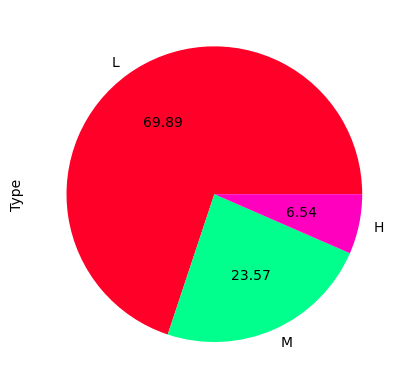

In [5]:
data["Type"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data is in good format, and thus we can move on with life 

## 3.2 | Air temperature [K]


Air temperature can have a significant impact on machine failure, as air temperature increases, the rate of machine failure increases.

<Axes: xlabel='Air temperature [K]', ylabel='Density'>

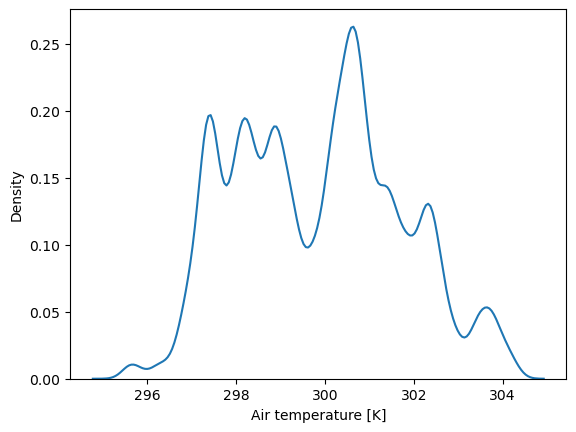

In [6]:
sns.kdeplot(data["Air temperature [K]"])

The data is in good format, and thus we can move on with life 

## 3.3 | Process temperature [K]


The impact of process temperature on machine failure can be significant. As temperature increases, the rate of chemical reactions and physical processes also increases. This can lead to increased wear and tear on machine components, as well as the formation of defects that can eventually lead to failure.

<Axes: xlabel='Process temperature [K]', ylabel='Density'>

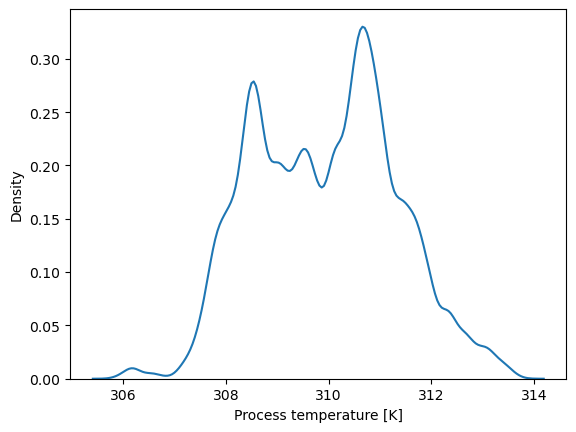

In [7]:
sns.kdeplot(data["Process temperature [K]"])

The data is in good format, and thus we can move on with life 

## 3.4 | Rotational speed [rpm]

The rotational speed of a machine has a direct impact on its failure rate. As the rotational speed increases, the forces acting on the machine's components also increase. This can lead to fatigue, wear, and ultimately failure. The relationship between rotational speed and failure rate is not linear. At low rotational speeds, the failure rate is low. However, as the rotational speed increases, the failure rate increases exponentially.

<Axes: >

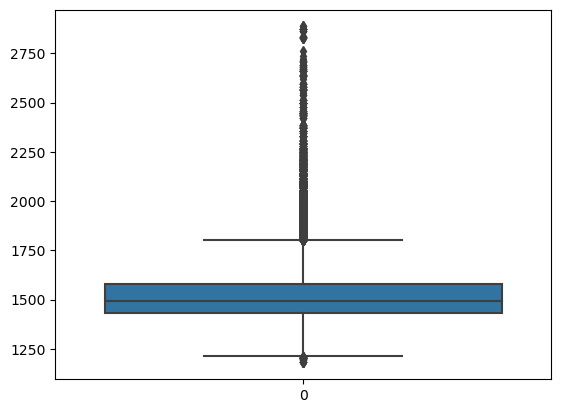

In [8]:
sns.boxplot(data["Rotational speed [rpm]"])

As we can see there are outliers in this column, it would be better if we place a `kink` at $2,000$ to balance the data 

In [9]:
data["Rotational speed [rpm]"] = np.where(data["Rotational speed [rpm]"] > 2000 , data["Rotational speed [rpm]"].mean() , data["Rotational speed [rpm]"])

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

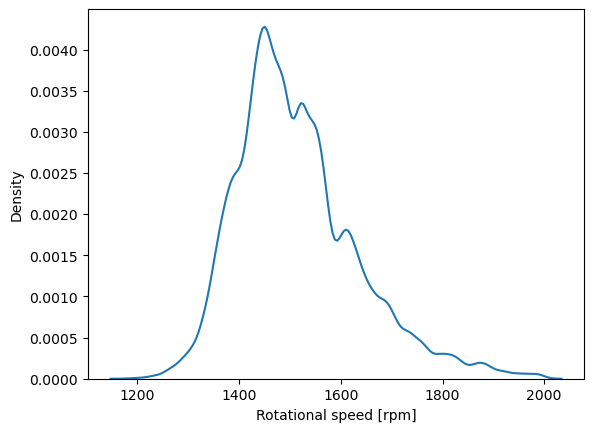

In [10]:
sns.kdeplot(data["Rotational speed [rpm]"])

Now, this data is in good format, and thus we can move on with life 

## 3.4 | Torque [Nm]

When too much torque is applied to a machine, the components can be overstressed and fail. This can happen due to a number of factors, such as overloading the machine, operating it outside of its design specifications, or using poor-quality components.

<Axes: xlabel='Torque [Nm]', ylabel='Density'>

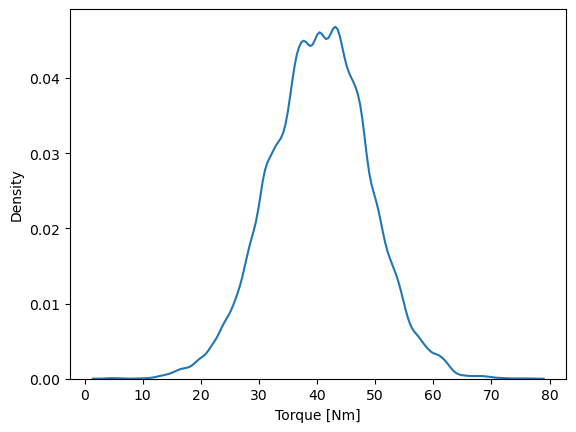

In [11]:
sns.kdeplot(data["Torque [Nm]"])

This data is in a condition where model buidling and finetuning will tell, if this needs improvment or not 

## 3.5 | Tool wear [min]	


Tool wear is the gradual degradation of a cutting tool's cutting edge due to the stresses and heat generated during machining. As the tool wears, it becomes less effective at cutting, which can lead to a number of problems

<Axes: xlabel='Tool wear [min]', ylabel='Density'>

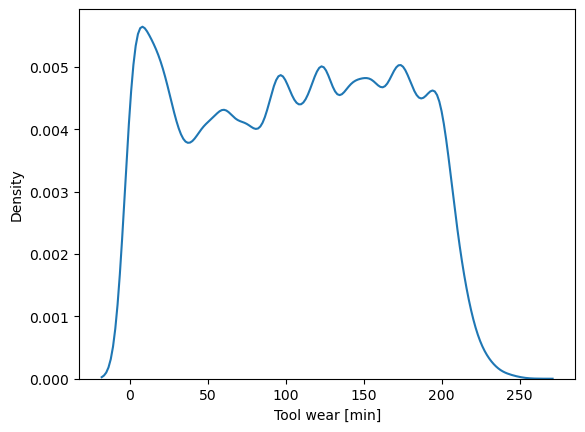

In [12]:
sns.kdeplot(data["Tool wear [min]"])

This data is in good format, and thus we can move on with life

## 3.6 | TWF

$TWF$ in machine failure stands for `Time Warping Filter`. It is a `measurement technique` that can be `used to determine`, `foresee`, and `regulate faults` in machines. $TWF$ displays units of `displacement`, `velocity`, and `acceleration`.

<Axes: ylabel='TWF'>

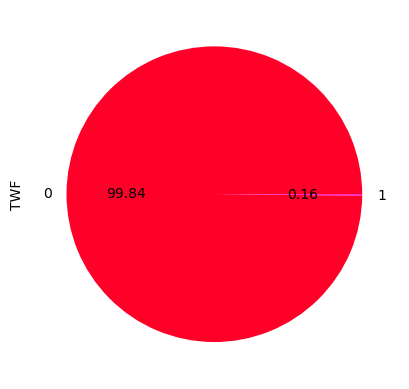

In [13]:
data["TWF"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data in this column is of no use as it is $99.84$% $0$ and $0.16$% $1$. I think this column denotes `wether the data was taken with thic teqnique or not`

## 3.7 | HDF

HDF in machine failure stands for Hidden Failure Detection. It is a technique used to identify potential problems in machines before they cause a failure. HDF uses machine learning to analyze data from sensors and other sources to identify patterns that may indicate a problem.

<Axes: ylabel='HDF'>

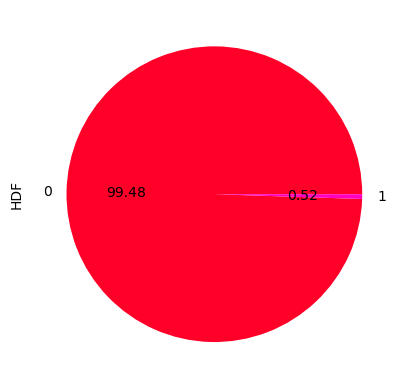

In [14]:
data["HDF"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data in this column is of no use as it is $99.60$% $0$ and $0.40$% $1$. I think this column denotes `wether the data was taken with thic teqnique or not`

## 3.9 | PWF

PWF stands for premature wear failure. It is a type of machine failure that occurs before the expected lifetime of the machine. PWF can be caused by a number of factors

<Axes: ylabel='PWF'>

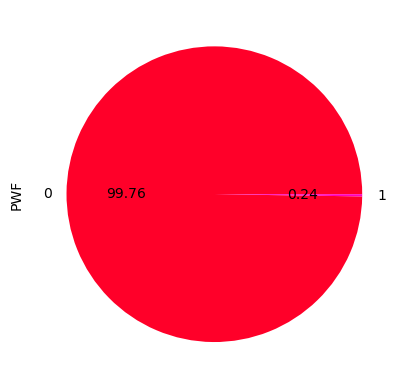

In [15]:
data["PWF"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data in this column is of no use as it is $99.76$% $0$ and $0.24$% $1$. I think this column denotes `wether the data was taken with thic teqnique or not`

## 3.10 | OSF

OSF stands for Overstrain Failure. It is a type of machine failure that occurs when a machine is subjected to excessive stress. This can be caused by a number of factors, including overloading, improper use, or manufacturing defects.



<Axes: ylabel='OSF'>

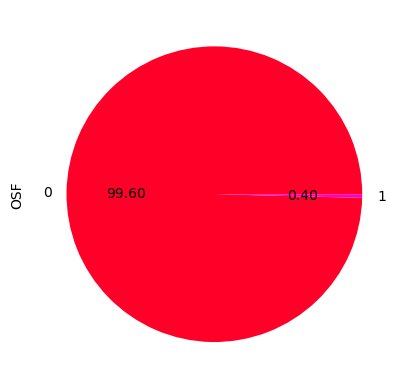

In [16]:
data["OSF"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data in this column is of no use as it is $99.60$% $0$ and $0.40$% $1$. I think this column denotes `wether the data was taken with thic teqnique or not`

## 3.11 | RNF

RNF stands for "Removed No Failure". It is a term used in the machine failure industry to describe a situation where a machine has been removed from service for inspection, but no failure is found

<Axes: ylabel='RNF'>

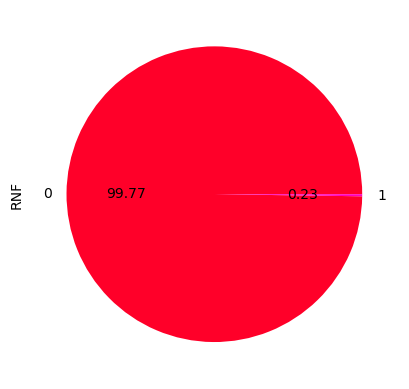

In [17]:
data["RNF"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

The data in this column is of no use as it is $99.77$% $0$ and $0.23$% $1$. I think this column denotes `wether the data was taken with thic teqnique or not`

# 4 | TO DO LIST 📄

```
TO DO 2 : MAKE A MODEL

TO DO 3 : IMPROVE THE RESULTS

TO DO 4 : DECREASE THE TRAINING TIME

TO DO 5 : TRAIN A NN

TO DO 6 : ADD WANDB SUPPORT
```

# 5 | Ending 🌆

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**

<IMG SRC = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $:)$**